In [1]:
# the Boston dataset is included in scikit-learn
from sklearn import datasets

In [2]:
#other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset
boston = datasets.load_boston()

In [4]:
display(type(boston), boston.keys())

sklearn.utils.Bunch

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.filename

'C:\\Users\\bea\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [8]:
# dataframe
df1 = pd.DataFrame(boston.data, columns=boston.feature_names)
df2 = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([df1, df2], axis=1)
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Create feature and target numpy arrays
X = df.drop('MEDV', axis=1).values
y = df.MEDV.values

#### Example of predicting house value from a single feature

In [10]:
X_rooms = X[:,5] # make sure feature and target have the same dimensions!!
display('Before:', X_rooms.shape, y.shape)
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)
display('After:', X_rooms.shape, y.shape)

'Before:'

(506,)

(506,)

'After:'

(506, 1)

(506, 1)

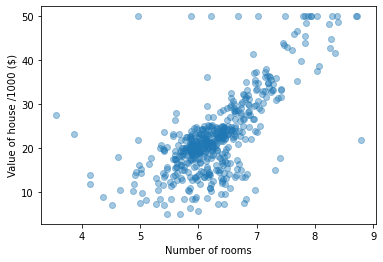

In [11]:
#EDA
plt.scatter(X_rooms, y, alpha=0.4)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

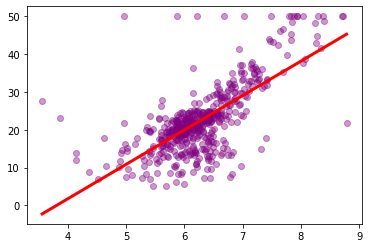

In [12]:
# Fit the regression model
from sklearn.linear_model import LinearRegression
#instanciate
reg1 = LinearRegression()
#train model
reg1.fit(X_rooms, y)
# check out the regressors predictions over the range of the data: Create the prediction space
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)
# Compute predictions over the prediction space: y_pred
y_pred = reg1.predict(prediction_space)
# plot
plt.scatter(X_rooms, y,
            color='purple', alpha=0.4)
plt.plot(prediction_space, y_pred,
         color='red', linewidth=3)
plt.show()

#### using all features

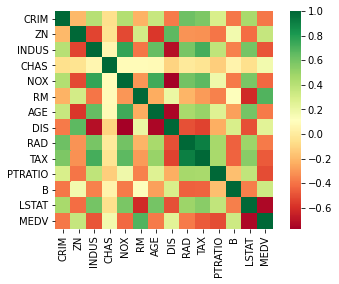

In [13]:
#EDA
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,    
                                                    test_size = 0.3, random_state=5555)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
#R^2:
display(reg_all.score(X_test, y_test)) # in regression models, the score tells the amount of variance in the target variable 
                                        # that is predicted from the feature variables
# RMSE - Root Mean Squared Error
display(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7909889275567008

3.9629619334984136

### Cross Validation (k-fold CV)
To combat this dependence on what is essentially an arbitrary split, as the data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model's ability to generalize to unseen data.
CV shoud be performend on the training set.

In [15]:
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average 5-Fold CV Score: 0.3532759243958772


#### Regularization 

##### for feature selection,Lasso
performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha.

[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]


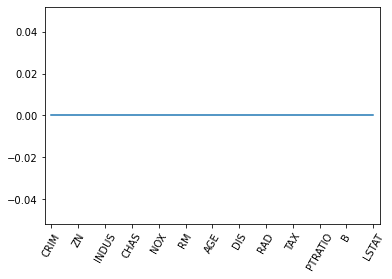

In [16]:
# Import Lasso
from sklearn.linear_model import Lasso
# names
names = df.drop('MEDV', axis=1).columns
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)
# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.margins(0.02)
plt.show()

##### building regression models, Ridge
sum of the squared values of the coefficients multiplied by some alpha

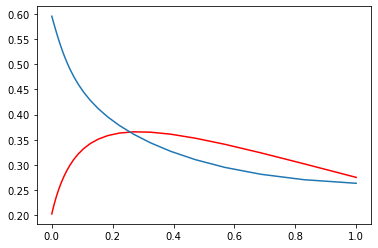

In [17]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(alpha_space,ridge_scores, c='r')
plt.plot(alpha_space,ridge_scores_std)
plt.show()

### ElasticNet regressor

### Pipeline 

In [18]:
#imports 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StardardScaler
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import Imputer

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

ImportError: cannot import name 'StardardScaler' from 'sklearn.preprocessing' (C:\Users\bea\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)